In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
#Reading the csv
df=pd.read_csv('car_price_pred.csv')
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [38]:
# Check missing values
print(df.isnull().sum().sort_values(ascending=False))  # Display missing values count

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64


In [39]:
# Check for duplicated values
print(df.duplicated().sum())

0


In [40]:
# Display descriptive summary of the dataset
print(df.describe())  # Show summary statistics for numerical columns

               Year   Engine_Size        Mileage         Doors   Owner_Count  \
count  10000.000000  10000.000000   10000.000000  10000.000000  10000.000000   
mean    2011.543700      3.000560  149239.111800      3.497100      2.991100   
std        6.897699      1.149324   86322.348957      1.110097      1.422682   
min     2000.000000      1.000000      25.000000      2.000000      1.000000   
25%     2006.000000      2.000000   74649.250000      3.000000      2.000000   
50%     2012.000000      3.000000  149587.000000      3.000000      3.000000   
75%     2017.000000      4.000000  223577.500000      4.000000      4.000000   
max     2023.000000      5.000000  299947.000000      5.000000      5.000000   

             Price  
count  10000.00000  
mean    8852.96440  
std     3112.59681  
min     2000.00000  
25%     6646.00000  
50%     8858.50000  
75%    11086.50000  
max    18301.00000  


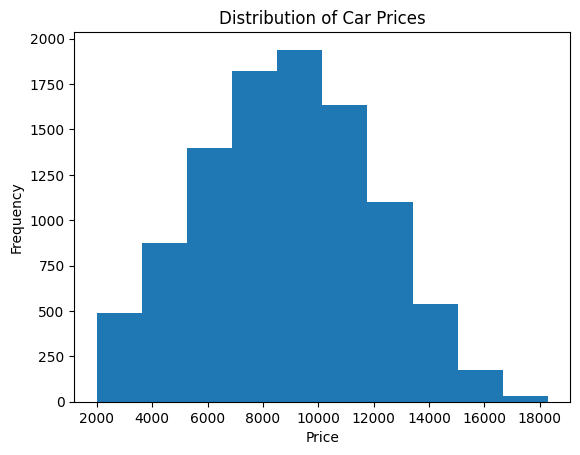

In [41]:
# Visualizations
plt.hist(df['Price'])  # Plot histogram of car prices
plt.title('Distribution of Car Prices')  # Add title to the plot
plt.xlabel('Price')  # Label x-axis
plt.ylabel('Frequency')  # Label y-axis
plt.show()  # Display the plot

In [42]:
#Using label encoding to convert strings into numerical values
df['Brand']=df['Brand'].map({'Kia':0,'Chevrolet':1,'Mercedes':2,'Audi':3,'Volkswagen':4,
                                     'Toyota':5,'Honda':6,'BMW':7,'Hyundai':8,'Ford':9})
df['Model']=df['Model'].map({'Rio':0,'Malibu':1,'GLA':2,'Q5':3,'Golf':4,'Camry':5,'Civic':6,
                               'Sportage':7,'RAV4':8,'5 Series':9,'CR-V':10,'Elantra':11,'Tiguan':12,
                               'Equinox':13,'Explorer':14,'A3':15,'3 Series':16,'Tucson':17,'Passat':18,
                               'Impala':19,'Corolla':20,'Optima':21,'Fiesta':22,'A4':23,'Focus':24,'E-Class':25,
                               'Sonata':26,'C-Class':27,'X5':28,'Accord':29})
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,0,0,2020,4.2,Diesel,Manual,289944,3,5,8501
1,1,1,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,2,2,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,3,3,2023,2.0,Electric,Manual,160971,2,1,11780
4,4,4,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [43]:
#drop colums
df.drop(['Transmission','Engine_Size'], axis=1, inplace=True)

In [44]:
# Encode categorical variables (if necessary)
df = pd.get_dummies(df, dtype=int)
df.head()

,Brand,Model,Year,Mileage,Doors,Owner_Count,Price,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol
0,0,0,2020,289944,3,5,8501,1,0,0,0
1,1,1,2012,5356,2,3,12092,0,0,1,0
2,2,2,2020,231440,4,2,11171,1,0,0,0
3,3,3,2023,160971,2,1,11780,0,1,0,0
4,4,4,2003,286618,3,3,2867,0,0,1,0


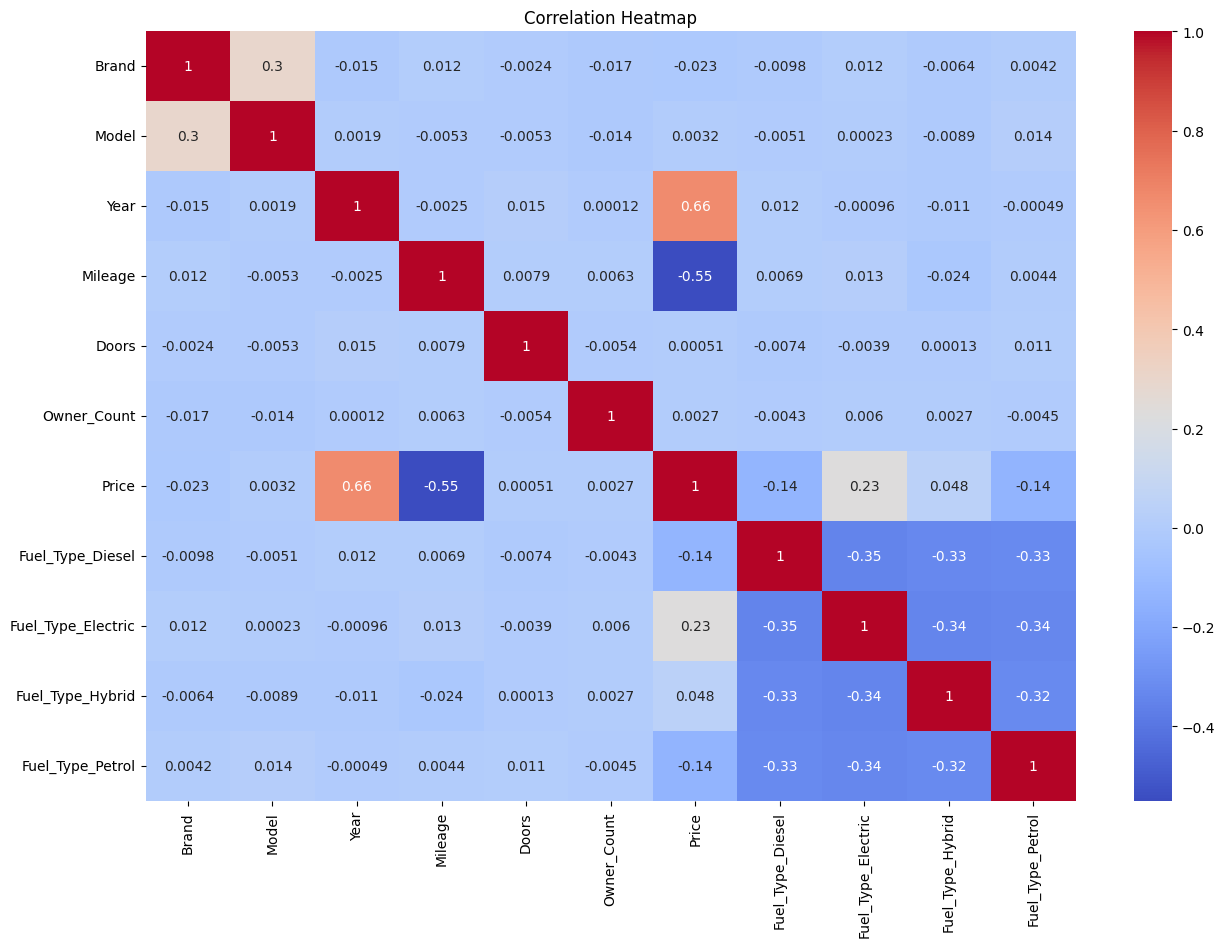

In [45]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')  #title to the heatmap
plt.show()  # Display the heatmap

In [46]:
# Select features (independent variables) and target (dependent variable)
X = df.drop('Price', axis=1)  # Features (drop the target column 'price')
y = df['Price']  # Target variable

In [47]:
df.keys()

Index(['Brand', 'Model', 'Year', 'Mileage', 'Doors', 'Owner_Count', 'Price',
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_Hybrid',
       'Fuel_Type_Petrol'],
      dtype='object')

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
# split this X and y into Train_data and test_data
X_train, X_test,y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42 )

In [50]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 10), (2000, 10), (8000,), (2000,))

In [51]:
# intialize the model
model=LinearRegression()

# train the model
model.fit(X_train, y_train)

# test the model
y_pred=model.predict(X_test)

In [52]:
# Print coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Intercept: -592341.0798455807
Coefficients: [-1.23278855e+01 -8.60357829e-02  3.00330437e+02 -1.97713727e-02
  1.97360497e+00  1.41042770e+01 -7.61433896e+02  1.26757765e+03
  2.46654032e+02 -7.52797787e+02]


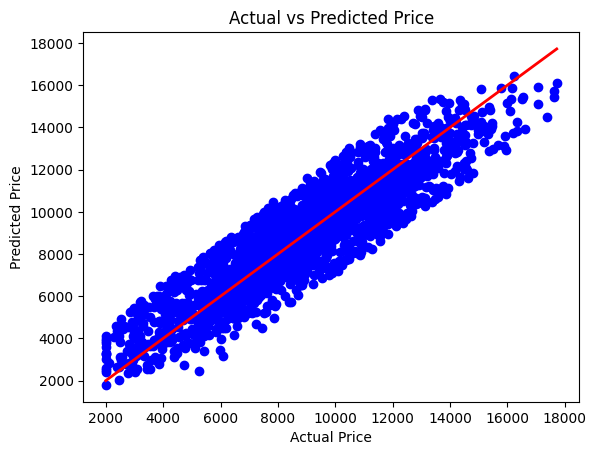

In [53]:
# Predicting the sales
y_pred = model.predict(X_test)

# Plotting actual vs predicted sales
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Perfect prediction line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()

In [54]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('R2 Score: ', r2_score(y_test, y_pred))

Mean Squared Error:  1729996.7752754625
Root Mean Squared Error:  1315.2934179396864
Mean Absolute Error:  1084.213180197402
R2 Score:  0.811707422424343


In [55]:
import pickle
pickle.dump(model, open('car_price_pred.pkl', 'wb')) # Save the trained model to a file